# Project Overview and Goal

*This project aims to evaluate the effect of drugs used to treat anti-anxiety on memory. The dataset used for this project contains data collected from virtual, non-human participants in a virtual environment designed to mimic real humans. Exploratory data analysis was conducted, including cleaning and structuring. Once the data was properly cleaned and structured, it was used in multiple hypothesis tests to evaluate the effects of drug type, dosage, and emotional priming condition on memory.*

**Independent variables (randomly assigned):**
1. Drug condition: A (Xanax), control (Sugar), or T (Halcion).
2. Dosage condition: Low, Moderate, or High.
3. Emotional priming condition: H (Happy) or S (Sad). There is evidence that priming individuals with happy or sad memories can affect their performance on memory-related measures.

**Dependent variable:**
1. Difference in memory response time between pre-intervention memory test scores and post-intervention memory test scores. This metric compares memory response time on a memory test before exposure to the treatment conditions and afterward. Higher differences indicate an increase in memory response time after exposure relative to before, reflecting a negative impact on memory. Lower (or negative) differences indicate a decrease in memory response time after exposure relative to before, reflecting an improvement in memory performance. 

**Tests conducted:**
1. A two-sample t-test (comparable to an A/B test) assessing the difference between the two emotional priming groups (happy vs. sad).
2. A one-way ANOVA assessing the difference between the three drug conditions (Xanax, control, Halcion).
3. A two-way ANOVA assessing the main effects and interaction effect of drug condition and emotional priming condition.
4. A two-way ANOVA assessing the main effects and interaction effect of drug condition and dosage.

# Importing Packages and Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [2]:
# Importing data
df_memory = pd.read_csv('Islander_data.csv')

# Exploratory Data Analysis

## Initial structuring and cleaning

In [3]:
# Initial examination of the dataset
df_memory.head()

,first_name,last_name,age,Happy_Sad_group,Dosage,Drug,Mem_Score_Before,Mem_Score_After,Diff
0,Bastian,Carrasco,25,H,1,A,63.5,61.2,-2.3
1,Evan,Carrasco,52,S,1,A,41.6,40.7,-0.9
2,Florencia,Carrasco,29,H,1,A,59.7,55.1,-4.6
3,Holly,Carrasco,50,S,1,A,51.7,51.2,-0.5
4,Justin,Carrasco,52,H,1,A,47.0,47.1,0.1


*It appears as though the data contains participant names. Since these are not real individuals, I included these steps in the analysis. Normally, this information could be used to personally identify individuals, so it should be removed during preprocessing. It also appears as though some participants have the same last name, suggesting that duplicates may be present.*

In [4]:
# Checking for duplicate rows
df_memory.duplicated().sum()

0

*There are no duplicate rows in the data.*

In [5]:
# Checking for duplicate participant names
df_memory[df_memory.duplicated(['first_name', 'last_name'], keep = False) == True].sort_values(by = 'first_name')

,first_name,last_name,age,Happy_Sad_group,Dosage,Drug,Mem_Score_Before,Mem_Score_After,Diff
6,Ava,Durand,35,S,1,A,44.1,56.0,11.9
117,Ava,Durand,25,S,3,S,44.1,41.5,-2.6
12,Ayano,Kennedy,39,H,1,A,35.5,40.7,5.2
35,Ayano,Kennedy,38,H,2,A,40.2,44.5,4.3
0,Bastian,Carrasco,25,H,1,A,63.5,61.2,-2.3
134,Bastian,Carrasco,27,H,1,T,51.4,51.4,0.0
161,Ciara,Durand,54,H,2,T,55.2,51.7,-3.5
118,Ciara,Durand,29,S,3,S,40.5,33.4,-7.1
193,Jacob,Novak,52,H,3,T,71.3,74.3,3.0
171,Jacob,Novak,37,H,2,T,44.5,47.7,3.2


*There are a few participants with the exact same names. That being said, their ages, conditions, and results are different. This suggests that they are independent observations that have the same name (likely due to the way this data was generated).*

In [6]:
# Replacing the name columns with ID numbers to make data anonymous
df_memory1 = df_memory.drop(['first_name', 'last_name'], axis = 1).reset_index()
df_memory1 = df_memory1.rename(columns = {'index' : 'id'})
df_memory1.head()

,id,age,Happy_Sad_group,Dosage,Drug,Mem_Score_Before,Mem_Score_After,Diff
0,0,25,H,1,A,63.5,61.2,-2.3
1,1,52,S,1,A,41.6,40.7,-0.9
2,2,29,H,1,A,59.7,55.1,-4.6
3,3,50,S,1,A,51.7,51.2,-0.5
4,4,52,H,1,A,47.0,47.1,0.1


*Now that names are removed, the data is anonymized. Names are replaced with ids to help identify unique rows.*

## Discovery

In [7]:
# Viewing data
df_memory1.head()

,id,age,Happy_Sad_group,Dosage,Drug,Mem_Score_Before,Mem_Score_After,Diff
0,0,25,H,1,A,63.5,61.2,-2.3
1,1,52,S,1,A,41.6,40.7,-0.9
2,2,29,H,1,A,59.7,55.1,-4.6
3,3,50,S,1,A,51.7,51.2,-0.5
4,4,52,H,1,A,47.0,47.1,0.1


In [8]:
# Viewing dataframe structure
df_memory1.shape

(198, 8)

In [9]:
# Viewing data types and non-null value count
df_memory1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                198 non-null    int64  
 1   age               198 non-null    int64  
 2   Happy_Sad_group   198 non-null    object 
 3   Dosage            198 non-null    int64  
 4   Drug              198 non-null    object 
 5   Mem_Score_Before  198 non-null    float64
 6   Mem_Score_After   198 non-null    float64
 7   Diff              198 non-null    float64
dtypes: float64(3), int64(3), object(2)
memory usage: 12.5+ KB


*It seems that most of the data is of the correct type. The only change is that 'Dosage' should be categorical. There do not appear to be null values in any of the columns. Capitalization of column names is inconsistent and should be changed.*

In [10]:
# Making all column names lowercase
for col in list(df_memory1.columns):
    df_memory1 = df_memory1.rename(columns = {col : str.lower(col)})

In [11]:
# Exploring descriptive statistics
df_memory1.describe(include = 'all')

,id,age,happy_sad_group,dosage,drug,mem_score_before,mem_score_after,diff
count,198.000000,198.000000,198,198.000000,198,198.000000,198.000000,198.000000
unique,NaN,NaN,2,NaN,3,NaN,NaN,NaN
top,NaN,NaN,H,NaN,A,NaN,NaN,NaN
freq,NaN,NaN,99,NaN,67,NaN,NaN,NaN
mean,98.500000,39.530303,NaN,1.989899,NaN,57.967677,60.922222,2.954545
std,57.301832,12.023099,NaN,0.818504,NaN,15.766007,18.133851,10.754603
min,0.000000,24.000000,NaN,1.000000,NaN,27.200000,27.100000,-40.400000
25%,49.250000,30.000000,NaN,1.000000,NaN,46.525000,47.175000,-3.175000
50%,98.500000,37.000000,NaN,2.000000,NaN,54.800000,56.750000,1.700000
75%,147.750000,48.000000,NaN,3.000000,NaN,68.400000,73.250000,5.925000


*Descriptive statistics reveal that participant ages range from 24 to 83, with a mean age of 39.53. The average difference in before vs. after memory scores is 2.95, ranging from -40.40 to 49.*

In [12]:
# Looking at groups of different columns
print(df_memory1['happy_sad_group'].value_counts())
print(df_memory1['drug'].value_counts())
print(df_memory1['dosage'].value_counts())

H    99
S    99
Name: happy_sad_group, dtype: int64
A    67
S    66
T    65
Name: drug, dtype: int64
1    67
2    66
3    65
Name: dosage, dtype: int64


*The data appears to be evenly split into the different groups for each of the independent variables.*

In [13]:
# Defining a function to produce descriptive statistics for specified columns
def descriptive_stats(df, col_list):
    for col in col_list:
        print(f'{col} range: {min(df[col]):.2f} to {max(df[col]):.2f}')
        print(f'mean {col}: {np.mean(df[col]):.2f}')
        print()

In [14]:
# Getting descriptive stats for the numeric columns
descriptive_stats(df_memory1, ['age', 'mem_score_before', 'mem_score_after', 'diff'])

age range: 24.00 to 83.00
mean age: 39.53

mem_score_before range: 27.20 to 110.00
mean mem_score_before: 57.97

mem_score_after range: 27.10 to 120.00
mean mem_score_after: 60.92

diff range: -40.40 to 49.00
mean diff: 2.95



In [15]:
# Comparing descriptive stats for the happy group versus the sad group
df_happy = df_memory1[df_memory1['happy_sad_group'] == 'H']
df_sad = df_memory1[df_memory1['happy_sad_group'] == 'S']

print('Happy group:')
descriptive_stats(df_happy, ['mem_score_before', 'mem_score_after', 'diff'])

print('Sad group:')
descriptive_stats(df_sad, ['mem_score_before', 'mem_score_after', 'diff'])

Happy group:
mem_score_before range: 27.20 to 110.00
mean mem_score_before: 57.84

mem_score_after range: 27.10 to 114.00
mean mem_score_after: 60.58

diff range: -22.20 to 49.00
mean diff: 2.73

Sad group:
mem_score_before range: 28.30 to 90.00
mean mem_score_before: 58.09

mem_score_after range: 30.50 to 120.00
mean mem_score_after: 61.27

diff range: -40.40 to 39.00
mean diff: 3.18



*The happy priming group had a lower average difference in memory response time compared to the sad priming group. A two-sample t-test can confirm whether or not this difference is statistically significant.*

In [16]:
# Comparing descriptive stats for the different drug groups
df_drug_A = df_memory1[df_memory1['drug'] == 'A']
df_drug_S = df_memory1[df_memory1['drug'] == 'S']
df_drug_T = df_memory1[df_memory1['drug'] == 'T']

print('Drug A (Xanax):')
descriptive_stats(df_drug_A, ['diff'])

print('Drug S (Control):')
descriptive_stats(df_drug_S, ['diff'])

print('Drug T (Halcion):')
descriptive_stats(df_drug_T, ['diff'])

Drug A (Xanax):
diff range: -16.30 to 49.00
mean diff: 9.47

Drug S (Control):
diff range: -40.40 to 16.00
mean diff: -0.17

Drug T (Halcion):
diff range: -22.20 to 24.10
mean diff: -0.59



*The drug A (Xanax) group had higher differences in before vs. after memory response time relative to the other two drug groups. A one-way ANOVA can confirm whether or not this difference is statistically significant.*

## Cleaning and Structuring

In [17]:
# Creating a separate dataset for the cleaned data
df_memory_clean = df_memory1.copy()

*Creating a copy of the dataset that will be cleaned, leaving the original dataset intact.*

In [18]:
# Changing drug 'S' to 'Control' for clarity. 'S' stands for 'Sugar' (placebo)
df_memory_clean['drug'] = df_memory_clean['drug'].replace('S', 'Control')

In [19]:
# Double checking for NULL values
df_memory_clean.isna().sum()

id                  0
age                 0
happy_sad_group     0
dosage              0
drug                0
mem_score_before    0
mem_score_after     0
diff                0
dtype: int64

In [20]:
# Changing the dosage column to categorical and assigning the categories names
dose_cat = ['low', 'moderate', 'high']

df_memory_clean['dosage'] = pd.Categorical(
    df_memory_clean['dosage'].replace({1 : 'low', 2 : 'moderate', 3 : 'high'}),
               categories = dose_cat, ordered = True)

*This ensures that the 'dosage' column will be treated as categorical. The data is ordered, with higher doses being greater than moderate or low doses.*

In [21]:
# Checking for duplicates
df_memory_clean[df_memory_clean.duplicated(df_memory_clean.columns[1:]) == True]

,id,age,happy_sad_group,dosage,drug,mem_score_before,mem_score_after,diff


*A search for rows containing duplicate data (other than the row id) revealed that there are no duplicates.*

In [22]:
# Defining a function to check for outliers (values outside of 3 standard deviations from the mean)
def outliers (df, column):
    df_copy = df.copy()
    df_copy['zscore'] = stats.zscore(df[column])
    return df_copy[(df_copy['zscore'] > 3) | (df_copy['zscore'] < -3)]

In [23]:
outliers(df_memory_clean, 'age')

,id,age,happy_sad_group,dosage,drug,mem_score_before,mem_score_after,diff,zscore
157,157,83,H,moderate,T,44.2,44.5,0.3,3.624680
181,181,80,S,high,T,58.4,63.6,5.2,3.374528


*There are two rows with ages greater than three standard deviations from the mean. It doesn't appear as though there are any problems with these observations, so even though they can be considered outliers, I chose not to remove them from the data.*

In [24]:
outliers(df_memory_clean, 'diff')

,id,age,happy_sad_group,dosage,drug,mem_score_before,mem_score_after,diff,zscore
48,48,35,H,high,A,65.0,114.0,49.0,4.292318
56,56,27,S,high,A,81.0,120.0,39.0,3.360126
60,60,34,S,high,A,57.3,96.0,38.7,3.332161
109,109,31,S,moderate,Control,84.5,44.1,-40.4,-4.041474


*There are four rows that have outliers in the 'diff' column. This is our dependent variable of interest. Two of the observations are greater than four standard deviations from the mean, these observations could skew the results of our analyses.*

In [25]:
outliers(df_memory_clean, 'mem_score_before')

,id,age,happy_sad_group,dosage,drug,mem_score_before,mem_score_after,diff,zscore
188,188,73,H,high,T,110.0,87.8,-22.2,3.308651


In [26]:
outliers(df_memory_clean, 'mem_score_after')

,id,age,happy_sad_group,dosage,drug,mem_score_before,mem_score_after,diff,zscore
56,56,27,S,high,A,81.0,120.0,39.0,3.266131


*This row appears as an outlier in the 'mem_score_after' column and the 'diff' column. The reason it might be an outlier in the 'diff' column is because they had such a high 'before' score. It is not as far from the mean as some of the other rows, so I chose not to remove it.*

In [27]:
# Removing outliers more than 4 standard devations away from the mean as to not skew the results
df_memory_clean = df_memory_clean[~df_memory_clean['id'].isin([48, 109])]

## Validating Cleaning and Structuring

In [28]:
df_memory_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196 entries, 0 to 197
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   id                196 non-null    int64   
 1   age               196 non-null    int64   
 2   happy_sad_group   196 non-null    object  
 3   dosage            196 non-null    category
 4   drug              196 non-null    object  
 5   mem_score_before  196 non-null    float64 
 6   mem_score_after   196 non-null    float64 
 7   diff              196 non-null    float64 
dtypes: category(1), float64(3), int64(2), object(2)
memory usage: 12.6+ KB


*All of the columns are of the correct data type, there are no null values, and all of the column names are consistent.*

In [29]:
print(df_memory_clean['dosage'].value_counts())
print(df_memory_clean['drug'].value_counts())

low         67
moderate    65
high        64
Name: dosage, dtype: int64
A          66
Control    65
T          65
Name: drug, dtype: int64


*The values in the 'dosage' column were properly changed, and drug 'S' (sugar) was properly changed to 'Control'.*

In [30]:
# Ensuring outlier rows got removed correctly
df_memory_clean[df_memory_clean['id'].isin([48, 109])]

,id,age,happy_sad_group,dosage,drug,mem_score_before,mem_score_after,diff


*The outlier rows were successfully removed from the dataset. The dataset is ready to be used for hypothesis testing.*

# Hypothesis testing

## Test 1: A/B Test

*A two-sample t-test.*

Is the difference in before versus after memory scores significantly different based on randomly assigned happy/sad priming condition?

### *Null and Alternative Hypotheses*

**Null hypothesis:** There is no difference in memory response time between happy and sad priming conditions.

**Alternative hypothesis:** There is a difference in memory response time between happy and sad priming condiitons.

**Significance Level:**  *Alpha = 0.05.* 

In [31]:
# Finding the t-test statistic and p-value
happy_df = df_memory_clean[df_memory_clean['happy_sad_group'] == 'H']
sad_df = df_memory_clean[df_memory_clean['happy_sad_group'] == 'S']

(t_statistic, p_value) = stats.ttest_ind(a = happy_df['diff'], b = sad_df['diff'], equal_var = False)

print(f'T-test statistic: {t_statistic} \np-value: {p_value}')

T-test statistic: -0.9692032880076372 
p-value: 0.3336652427658583


**Result:** The resulting p-value of 0.34 is greater than the significance level of 0.05, indicating that we fail to reject the null hypothesis. The observed difference in memory response times between happy and sad priming conditions could be due to chance. There is no statistically significant effect of happy/sad priming condition on difference in memory response times.

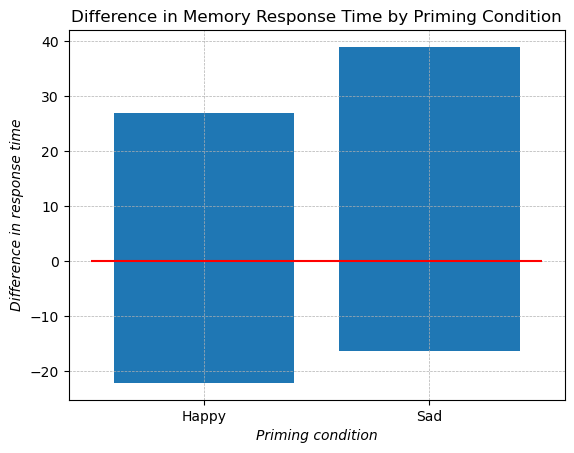

In [32]:
# Visualization of Difference in Memory Response Time by Priming Condition
fig, ax = plt.subplots()
ax.bar(data = df_memory_clean, x = 'happy_sad_group', height = 'diff')
ax.hlines(y = 0, xmin = -0.5, xmax = 1.5, linewidth = 1.5, color = 'r')
plt.xticks([0, 1], ['Happy', 'Sad'])
plt.xlabel('Priming condition', fontstyle = 'italic')
plt.ylabel('Difference in response time', fontstyle = 'italic')
plt.title('Difference in Memory Response Time by Priming Condition')
plt.grid(linestyle =  '--', linewidth = 0.5)
plt.show()

## Test 2: One-Way ANOVA

*An analysis of variance with one categorical independent variable.*

Is the difference in before versus after memory scores significantly different based on randomly assigned drug condition?

### *Null and Alternative Hypotheses*

**Null hypothesis:** There is no diffrence in memory response time between the three different drug conditions (Xanax, control, Halcion).

**Alternative hypothesis:** There is a difference in memory response time between drug condiitons.

**Significance Level:**  *Alpha = 0.05.* 

In [33]:
# Finding the F-test statistic and p-value
anova_model = ols('diff ~ C(drug)', data = df_memory_clean).fit()

sm.stats.anova_lm(anova_model, typ = 2)

,sum_sq,df,F,PR(>F)
C(drug),3534.485859,2.0,22.364315,1.838302e-09
Residual,15250.987611,193.0,NaN,NaN


In [34]:
# Post hoc test
tukey_oneway = pairwise_tukeyhsd(endog = df_memory_clean['diff'], groups = df_memory_clean['drug'], alpha = 0.05)
tukey_oneway.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
A,Control,-8.4235,0.0,-12.0925,-4.7545,True
A,T,-9.4589,0.0,-13.1279,-5.7899,True
Control,T,-1.0354,0.7846,-4.7183,2.6476,False


**Result:** The resulting p-value of 1.84e-09 is less than 0.05, indicating that we can reject the null hypothesis. There appears to be a significant difference in memory response time based on drug condition. The post hoc Tukey's HSD test revealed that there is a significant difference between drug A (Xanax) and the control group, between drug A (Xanax) and drug T (Halcion), but not between the control group and drug T (Halcion). The control group and the drug T (Halcion) group had significantly lower differences in memory response time than the drug A (Xanax) group. This indicates that the drug A (Xanax) group had significantly higher post-intervention memory response times than the other drug conditions. 

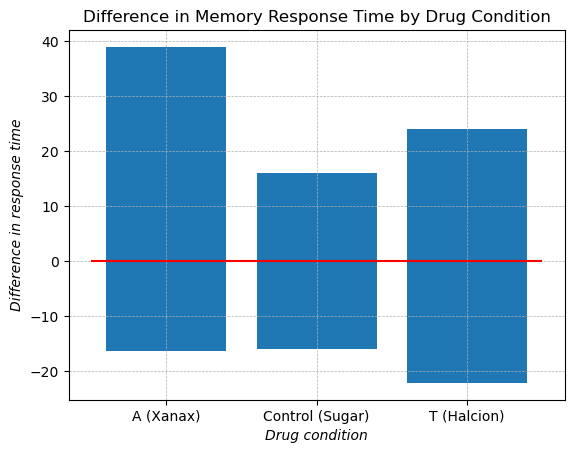

In [35]:
# Visualization of Difference in Memory Response Time by Drug Condition
fig, ax = plt.subplots()
ax.bar(data = df_memory_clean, x = 'drug', height = 'diff')
ax.hlines(y=0, xmin=-.5, xmax=2.5, linewidth=1.5, color='r')
plt.xticks([0, 1, 2], ['A (Xanax)', 'Control (Sugar)', 'T (Halcion)'])
plt.xlabel('Drug condition', fontstyle = 'italic')
plt.ylabel('Difference in response time', fontstyle = 'italic')
plt.title('Difference in Memory Response Time by Drug Condition')
plt.grid(linestyle =  '--', linewidth = 0.5)
plt.show()

## Test 3: Two-Way ANOVA

*An analysis of variance with two categorical independent variables.*

Is the difference in before versus after memory scores significantly different based on randomly assigned drug condition, happy/sad priming condition, or the interaction of the two conditions?

### *Null and Alternative Hypotheses*

 
**Main effect of drug condition:** 

*Null hypothesis:* There is no diffrence in memory response time between the three different drug conditions (Xanax, control, Halcion).

*Alternative hypothesis:* There is a difference in memory response time between drug condiitons.

**Main effect of happy/sad priming condition:** 

*Null hypothesis:* There is no diffrence in memory response time between happy and sad priming conditions.

*Alternative hypothesis:* There is a difference in memory response time between happy and sad priming condiitons.

**Interaction effect:**

*Null hypothesis:* The effect of drug condition on difference in memory response time is independent of happy/sad priming condition.

*Alternative hypothesis:* The difference in memory response time for each drug condition is different based on happy/sad priming condition. There is an interaction between drug condition and happy/sad priming condition on difference in memory response time.

**Significance Level:**  *Alpha = 0.05.* 

In [36]:
# Finding the F-statistics and p-values
anova_model2 = ols(formula = 'diff ~ C(drug) + C(happy_sad_group) + C(drug):C(happy_sad_group)', data = df_memory_clean).fit()

sm.stats.anova_lm(anova_model2, typ = 2)

,sum_sq,df,F,PR(>F)
C(drug),3511.843541,2.0,22.194823,2.174914e-09
C(happy_sad_group),67.879315,1.0,0.857993,3.554759e-01
C(drug):C(happy_sad_group),151.443459,2.0,0.957121,3.858402e-01
Residual,15031.664837,190.0,NaN,NaN


**Result:** There is a significant main effect of drug condition on difference in memory response time (p > 0.05), but no significant main effect of happy/sad priming condition (p = 0.35), and no interaction effect (p = 0.39). This indicates that the difference in memory scores between different drug groups was significant (similar to the results of the one-way ANOVA), but the difference in memory scores between different happy/sad priming conditions was not significant, and there does not appear to be an interaction between drug condition and happy/sad priming condition.

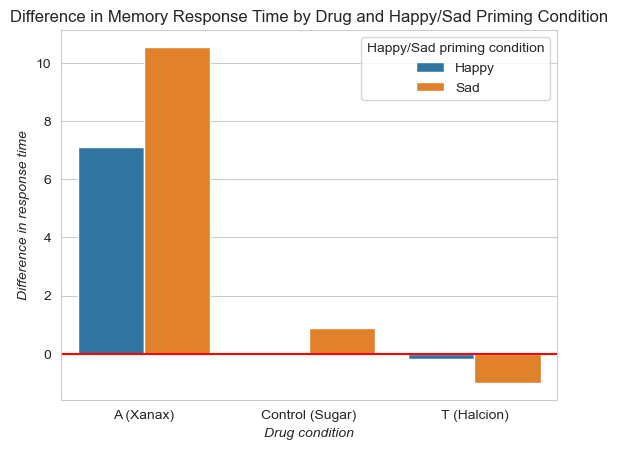

In [37]:
# Visualization of Difference in Memory Response Time by Drug and Happy/Sad Priming Condition
sns.set_style('whitegrid')
sns.barplot(data = df_memory_clean, x = 'drug', y = 'diff', hue = 'happy_sad_group', errorbar = None)
plt.xlabel('Drug condition', fontstyle = 'italic')
plt.ylabel('Difference in response time', fontstyle = 'italic')
plt.xticks([0, 1, 2], ['A (Xanax)', 'Control (Sugar)', 'T (Halcion)'])
plt.legend(labels = ['Happy', 'Sad'], title = 'Happy/Sad priming condition')
plt.title('Difference in Memory Response Time by Drug and Happy/Sad Priming Condition')
plt.axhline(0, color = 'r')
plt.show()

## Test 4: Two-Way ANOVA(2)

*An analysis of variance with two categorical independent variables.*

Is the difference in before versus after memory scores significantly different based on randomly assigned drug condition, dosage condition, or the interaction of the two conditions?

### *Null and Alternative Hypotheses*

 
**Main effect of drug condition:** 

*Null hypothesis:* There is no diffrence in memory response time between the three different drug conditions (Xanax, control, Halcion).

*Alternative hypothesis:* There is a difference in memory response time between drug condiitons.

**Main effect of dosage:** 

*Null hypothesis:* There is no diffrence in memory response time between low, moderate, and high dosage.

*Alternative hypothesis:* There is a difference in memory response time between low, moderate, and high dosage.

**Interaction effect:**

*Null hypothesis:* The effect of drug condition on difference in memory response time is independent of dosage.

*Alternative hypothesis:* The difference in memory response time for each drug condition is different based on dosage.

**Significance Level:**  *Alpha = 0.05.* 

In [38]:
anova_model3 = ols(formula = 'diff ~ C(drug) + C(dosage) + C(drug):C(dosage)', data = df_memory_clean).fit()

sm.stats.anova_lm(anova_model3, typ = 2)

,sum_sq,df,F,PR(>F)
C(drug),3579.208113,2.0,34.379749,1.927169e-13
C(dosage),944.932066,2.0,9.076457,1.729523e-04
C(drug):C(dosage),4571.954140,4.0,21.957739,7.148946e-15
Residual,9734.101405,187.0,NaN,NaN


In [39]:
# Post hoc test on dosage
tukey_oneway2 = pairwise_tukeyhsd(endog = df_memory_clean['diff'], groups = df_memory_clean['dosage'], alpha = 0.05)
tukey_oneway2.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
high,low,-5.2335,0.0061,-9.2076,-1.2593,True
high,moderate,-2.9679,0.1892,-6.9718,1.036,False
low,moderate,2.2656,0.3684,-1.6929,6.2241,False


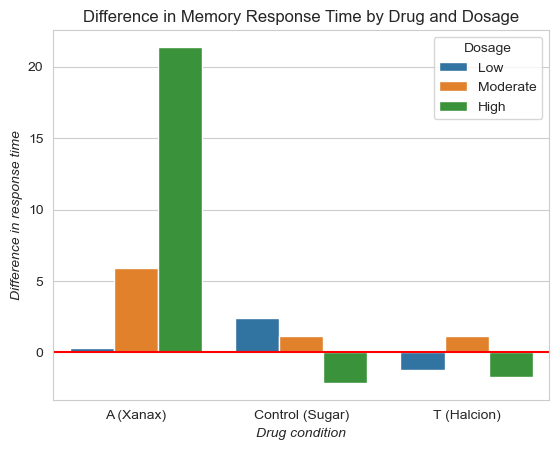

In [40]:
# Visualization of Difference in Memory Response Time by Drug and Dosage
sns.set_style('whitegrid')
sns.barplot(data = df_memory_clean, x = 'drug', y = 'diff', hue = 'dosage', errorbar = None)
plt.xlabel('Drug condition', fontstyle = 'italic')
plt.ylabel('Difference in response time', fontstyle = 'italic')
plt.xticks([0, 1, 2], ['A (Xanax)', 'Control (Sugar)', 'T (Halcion)'])
plt.legend(labels = ['Low', 'Moderate', 'High'], title = 'Dosage')
plt.title('Difference in Memory Response Time by Drug and Dosage')
plt.axhline(0, color = 'r')
plt.show()

**Results:** In addition to the significant main effect of drug condition, there is a significant main effect of dosage (p < 0.05), and a significant interaction effect (p < 0.05). This means that all three null hypotheses can be rejected. A Tukey's HSD post hoc test revealed that there is a significant difference in memory response time between high and low dosage conditions, but not between high and moderate, or low and moderate doses. The low dosage groups had significantly lower post-intervention memory response times than the high dosage group. The interaction effect between drug type and dosage was also significant, indicating that the difference in memory response time was different for the different drug groups based on dosage. The visualization illustrates that dosage affected the drug A (Xanax) group differently than the other two drug groups. High doeses of drug A (Xanax) were associated with significantly higher post-intervention memory response times, compared to low doses of drug A (Xanax). The other two drugs did not show the same magnitude or direction of difference in memory response times based on dosage. It could also be the case that the main effect of dosage was qualified by the interaction effect of dosage and drug condition.

# Conclusions

*Given that this data was not collected from real human participants, these analyses are purely exploratory for purposes of this project and any conclusions should be interpreted cautiously.*

**Main effect of drug condition (significant):** My analyses revealed that there is a main effect of drug condition on difference in memory response time. Observations in the drug A (Xanax) condition, performed worse on the memory test after exposure to the drug than before, as indicated by significantly longer response times relative to the drug T (Halcion) and control conditions. This suggests that use of Xanax may have a negative impact on memory.

**Main effect of dosage (significant):** In addition to a main effect of drug condition, there also was a significant main effect of dosage. Observations in the high dosage group had significantly higher differences in memory test respponse times after exposure than before, when compared to low and moderate dosage conditions. This main effect, however, could be qualified by the interaction effect between drug condition and dosage condition.

**Interaction effect of dosage and drug condition (significant):** There was a significant interaction between drug condition and dosage. Differences in memory test response times for observations in the drug A (Xanax) condition were greatly affected by dosage, with higher dosage being associated with longer test response times relative to moderate and low dosage conditions. The magnitude and direction of the effect of dosage was not present to the same degree in the other two drug conditions.

**Main effect of emotional priming condition:** No significant difference in memory test response times was found between observations in the happy priming condition relative to the sad priming condition. Any observed differences are likely due to chance. 

**Interaction effect of drug condition and emotional priming condition:** There also was not a significant interaction between drug condition and emotional priming condition. The difference in memory response times between the different drug conditions was not different based on the emotional priming conditions.

# Supplemental Visualizations

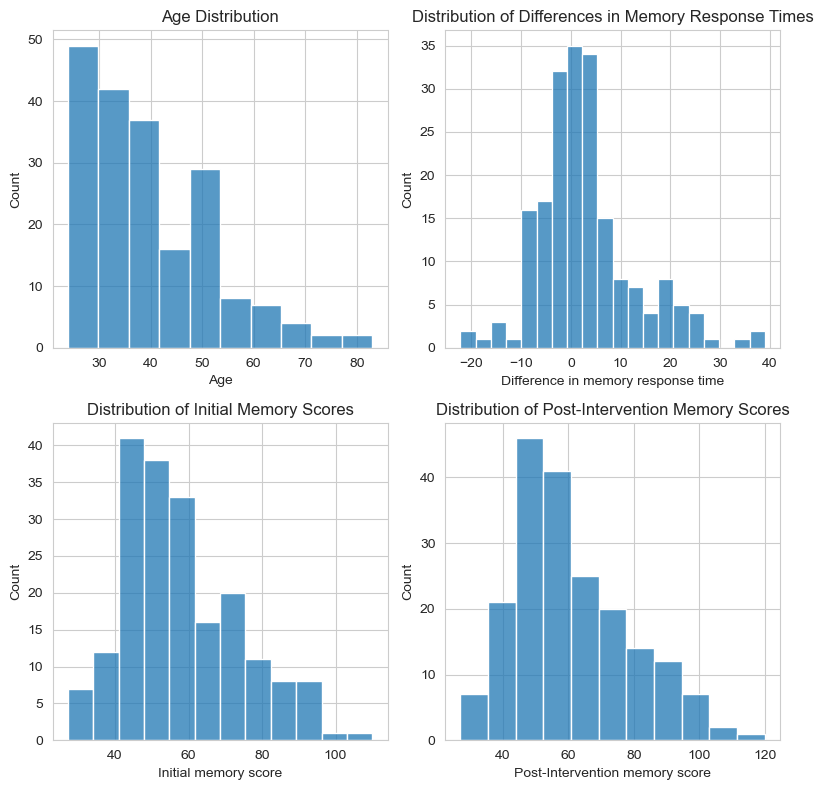

In [41]:
# Histograms
fig, axes = plt.subplots(2, 2, figsize = (8, 8))

sns.histplot(data = df_memory_clean, x = 'age', ax = axes[0, 0])
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_title('Age Distribution')

sns.histplot(data = df_memory_clean, x = 'diff', ax = axes[0, 1])
axes[0, 1].set_xlabel('Difference in memory response time')
axes[0, 1].set_title('Distribution of Differences in Memory Response Times')

sns.histplot(data = df_memory_clean, x = 'mem_score_before', ax = axes[1, 0])
axes[1, 0].set_xlabel('Initial memory score')
axes[1, 0].set_title('Distribution of Initial Memory Scores')

sns.histplot(data = df_memory_clean, x = 'mem_score_after', ax = axes[1, 1])
axes[1, 1].set_xlabel('Post-Intervention memory score')
axes[1, 1].set_title('Distribution of Post-Intervention Memory Scores')

plt.tight_layout()
plt.show()

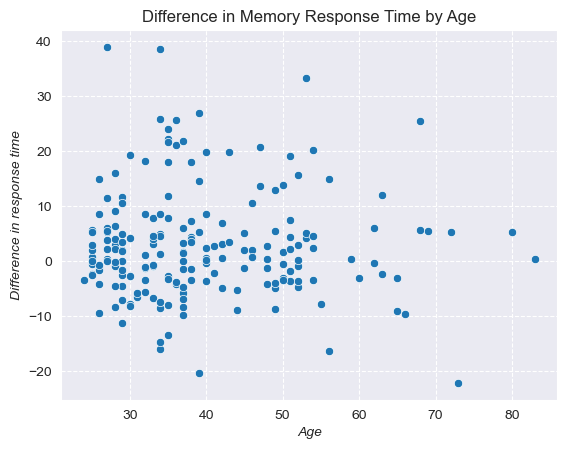

In [42]:
# Difference in Memory Response Time by Age
sns.set_style('darkgrid', {'grid.linestyle' : '--'})
sns.scatterplot(data = df_memory_clean, x = 'age', y = 'diff')
plt.xlabel ('Age', fontstyle = 'italic')
plt.ylabel('Difference in response time', fontstyle = 'italic')
plt.title('Difference in Memory Response Time by Age')
plt.show()